In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

In [3]:
# Считаем данные (pd.read_excel - функция для считывания данных из файла с расширением .xls)
df = pd.read_excel(r'C:\Users\sitki\Desktop\Курсовая\Курсовая_2.0\По_дням_ноябрь_молочка_и_хлеб.xls')

In [4]:
# Посмотрим на наши данные
df.head()

,Наименование,Количество,Сумма продажи,Прибыль,Дата
0,Аджика домашняя 260гр,2.0,130.00,46.00,2020-11-02
1,"Ацидофилин 2,7% 200г.ВМК БЗМЖ",4.0,71.81,9.85,2020-11-02
2,Батон ГОРЧИЧНЫЙ 300 г. Хлебозавод №1 +,21.0,419.90,81.38,2020-11-02
3,Батон Луковый 300г.Орион,2.0,57.93,11.93,2020-11-02
4,Батон НАРЕЗНОЙ 400 г. Хлебозавод №1 +,41.0,901.19,192.71,2020-11-02


In [5]:
# Для удобства переименуем колонки
df = df.rename(columns={'Наименование': 'name', 
                        'Количество': 'quantity', 
                        'Сумма продажи': 'total_sum', 
                        'Прибыль': 'income', 
                        'Дата': 'date'})

In [6]:
# Размеры датафрейма
df.shape

(2510, 5)

In [7]:
# Пропусков в датафрейме нет
df.isna().sum()

name         0
quantity     0
total_sum    0
income       0
date         0
dtype: int64

In [8]:
# Типы значений в колонках датафрейма
df.dtypes

name                 object
quantity            float64
total_sum           float64
income              float64
date         datetime64[ns]
dtype: object

In [9]:
# Создадим колонку, содержащую розничную цену товара
df['price'] = (df.income / df.quantity).round(2)

In [10]:
# Создадим колонку, содержащую день
df['day'] = df.date.apply(lambda x: x.day)

In [11]:
# Создадим колонку категории товара, чтобы, 
# во-первых, посмотреть, нет ли избыточной информации в данных (товары, не интересующие нас),
# во-вторых, использовать категорию товара как один из признаков
df['cathegory'] = df.name.apply(lambda x: x.split()[0])

In [12]:
df.head()

,name,quantity,total_sum,income,date,price,day,cathegory
0,Аджика домашняя 260гр,2.0,130.00,46.00,2020-11-02,23.00,2,Аджика
1,"Ацидофилин 2,7% 200г.ВМК БЗМЖ",4.0,71.81,9.85,2020-11-02,2.46,2,Ацидофилин
2,Батон ГОРЧИЧНЫЙ 300 г. Хлебозавод №1 +,21.0,419.90,81.38,2020-11-02,3.88,2,Батон
3,Батон Луковый 300г.Орион,2.0,57.93,11.93,2020-11-02,5.96,2,Батон
4,Батон НАРЕЗНОЙ 400 г. Хлебозавод №1 +,41.0,901.19,192.71,2020-11-02,4.70,2,Батон


In [13]:
# Видов категорий очень много; модель может переобучиться, если мы оставим данные в таком виде
df.cathegory.unique()

array(['Аджика', 'Ацидофилин', 'Батон', 'Батончик', 'Беляш', 'Бифидок',
       'Булка', 'Булочка', 'Булочки', 'Ватрушка', 'Йогурт', 'Йогуртный',
       'Кефир', 'Коктейль', 'Котлета', 'Лаваш', 'Майонез', 'Маргарин',
       'Масло', 'Молоко', 'Напиток', 'Палочка', 'Пампушки', 'Пирог',
       'Пицца', 'Плавленной', 'Плавленый', 'Плетенка', 'Плюшка',
       'Пончики', 'Продукт', 'Простокваша', 'Ромашка', 'Ромовая',
       'Ряженка', 'Сгущенка', 'Сливки', 'Слойка', 'Сметана', 'Сметанный',
       'Снежок', 'Сосиска', 'Соус', 'Сыр', 'Сырный', 'Сырок', 'Творог',
       'Творожная', 'Хачапури', 'Хлеб', 'Хлеб-е', 'Чиабатта', 'Шанежки',
       'Желе', 'Рожок', 'ХБИ', 'Майонезный', 'Масса', 'Сгущеночка',
       'Обереженка', 'Пироженое', 'Творожок', 'Палочки', 'Пуддинг',
       'Сырки'], dtype=object)

In [14]:
# Удаление избыточной информации
df = df.query('cathegory != "Ромашка" and cathegory != "Аджика" and cathegory != "Желе"')

In [15]:
# Создание более общих категорий
df['bread'] = np.where(df.cathegory.apply(lambda x: x in [
    'Батон', 'Батончик', 'Булка', 'Булочка', 'Булочки', 'Пампушки', 'Хлеб', 'Хлеб-е', 'Чиабатта', 'ХБИ', 'Лаваш', 'Плетенка'
    ]), 1, 0)
df['hotcake'] = np.where(df.cathegory.apply(lambda x: x in [
    'Беляш', 'Ватрушка', 'Котлета', 'Пирог', 'Пицца', 'Плюшка', 'Пончики', 'Ромовая', 'Слойка', 'Сосиска', 
    'Хачапури', 'Шанежки', 'Рожок', 'Пироженое']), 1, 0)
df['milk_or_sour_milk'] = np.where(df.cathegory.apply(lambda x: x in [
    'Ацидофилин', 'Бифидок', 'Йогурт', 'Йогуртный', 'Кефир', 'Коктейль', 'Молоко', 'Напиток', 'Ряженка', 
    'Сливки', 'Снежок', 'Обереженка', 'Простокваша']), 1, 0)
df['cheese_cottage_cheese'] = np.where(df.cathegory.apply(lambda x: x in [
    'Палочка', 'Продукт', 'Сырок', 'Творог', 'Плавленной', 'Плавленый', 'Сыр', 'Сырный', 
    'Творожная', 'Масса', 'Творожок', 'Палочки', 'Сырки']), 1, 0)
df['others'] = np.where(df.cathegory.apply(lambda x: x in [
    'Майонез', 'Маргарин', 'Масло', 'Сгущенка', 'Соус', 'Сметана', 'Сметанный', 'Майонезный', 'Сгущеночка', 
    'Пуддинг']), 1, 0)

<AxesSubplot:>

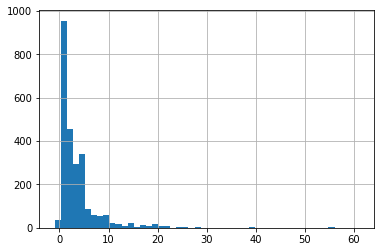

In [15]:
# Построим график распределения целевой переменной
df.quantity.hist(bins=50)

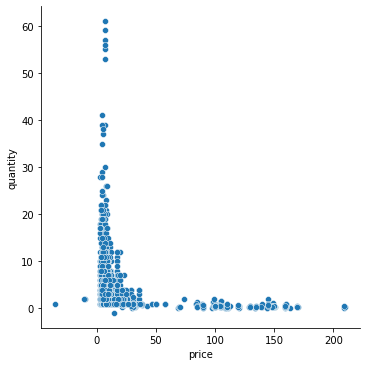

In [16]:
# График зависимости количества продаж от их розничной цены
sns.relplot(x='price', y='quantity', data=df)

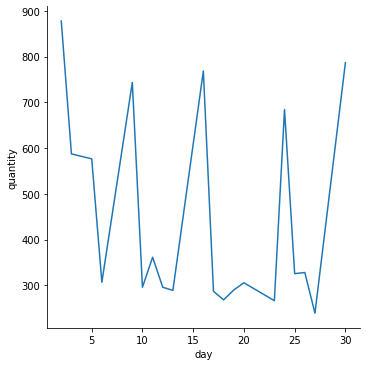

In [17]:
# График зависимости количества продаж от даты говорит нам о том, что явной взаимосвязи между этими параметрами нет
# При этом мы видим скачки продаж; можно предположить, что существует зависимость количества продаж от дня недели
sns.relplot(x='day', y='quantity', kind='line', data=df.groupby('day', as_index=False).agg({'quantity': 'sum'}))

In [16]:
# Создадим колонку, содержашую информацию о дне недели, в который произведена продажа 
df['week_day'] = df.date.apply(lambda x: x.weekday())

<AxesSubplot:xlabel='week_day', ylabel='quantity'>

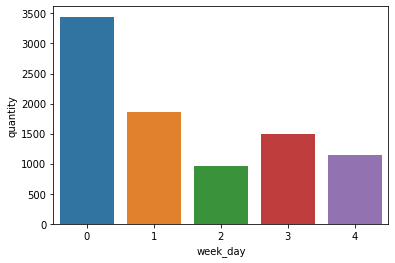

In [19]:
# Гистограмма зависимости продаж от дня недели (к сожалению, в данных представлены не все дни недели)
# Из гистограммы видно, что наше предположение верно, и, следовательно, день недели можно использовать как ещё один признак
df_by_week_day = df.groupby('week_day', as_index=False).agg({'quantity': 'sum'})
sns.barplot(x='week_day', y='quantity', data=df_by_week_day)

[Text(0, 0, 'bread'),
 Text(1, 0, 'hotcake'),
 Text(2, 0, 'milk_or_sour_milk'),
 Text(3, 0, 'cheese_cottage_cheese'),
 Text(4, 0, 'others')]

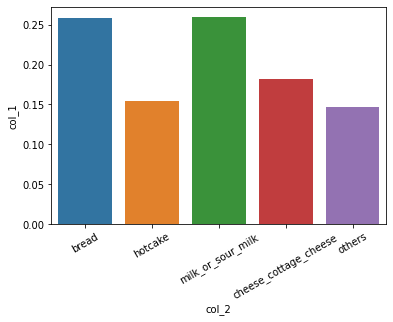

In [20]:
# Зависимость средней цены от категории товара
products_cathegories = pd.DataFrame({'col_1': pd.Series(
    [df.bread.mean(), df.hotcake.mean(), df.milk_or_sour_milk.mean(), df.cheese_cottage_cheese.mean(), df.others.mean()]), 
    'col_2': pd.Series(['bread', 'hotcake', 'milk_or_sour_milk', 'cheese_cottage_cheese', 'others'])})
pl = sns.barplot(x='col_2', y='col_1', data=products_cathegories)
pl.set_xticklabels(pl.get_xticklabels(), rotation=30)

In [21]:
df.head()

,name,quantity,total_sum,income,date,price,day,cathegory,bread,hotcake,milk_or_sour_milk,cheese_cottage_cheese,others,week_day
1,"Ацидофилин 2,7% 200г.ВМК БЗМЖ",4.0,71.81,9.85,2020-11-02,2.46,2,Ацидофилин,0,0,1,0,0,0
2,Батон ГОРЧИЧНЫЙ 300 г. Хлебозавод №1 +,21.0,419.90,81.38,2020-11-02,3.88,2,Батон,1,0,0,0,0,0
3,Батон Луковый 300г.Орион,2.0,57.93,11.93,2020-11-02,5.96,2,Батон,1,0,0,0,0,0
4,Батон НАРЕЗНОЙ 400 г. Хлебозавод №1 +,41.0,901.19,192.71,2020-11-02,4.70,2,Батон,1,0,0,0,0,0
5,Батон Нарезной 400г.Переславский х-д.,5.0,164.98,38.48,2020-11-02,7.70,2,Батон,1,0,0,0,0,0


In [17]:
# Удалим ненужные колонки (содержащие данные, которые не могут быть нам доступны на момент предсказания и
# вспомогательные колонки)
df = df.drop(['total_sum', 'income', 'date', 'cathegory'], axis=1)

In [18]:
# День недели - категориальный признак. Чтобы использовать его для модели линейной регрессии, применим one-hot кодирование
df = pd.get_dummies(df, columns=['week_day'])

In [19]:
df.head()

,name,quantity,price,day,bread,hotcake,milk_or_sour_milk,cheese_cottage_cheese,others,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4
1,"Ацидофилин 2,7% 200г.ВМК БЗМЖ",4.0,2.46,2,0,0,1,0,0,1,0,0,0,0
2,Батон ГОРЧИЧНЫЙ 300 г. Хлебозавод №1 +,21.0,3.88,2,1,0,0,0,0,1,0,0,0,0
3,Батон Луковый 300г.Орион,2.0,5.96,2,1,0,0,0,0,1,0,0,0,0
4,Батон НАРЕЗНОЙ 400 г. Хлебозавод №1 +,41.0,4.70,2,1,0,0,0,0,1,0,0,0,0
5,Батон Нарезной 400г.Переславский х-д.,5.0,7.70,2,1,0,0,0,0,1,0,0,0,0


In [20]:
df.to_csv('data.csv', index=False)